(1599, 384) (1601, 6)
1599
(1599, 384) (1599, 6)


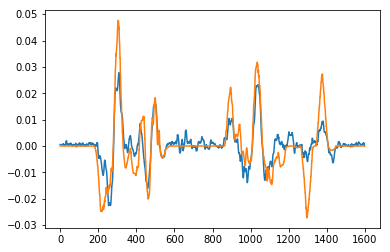

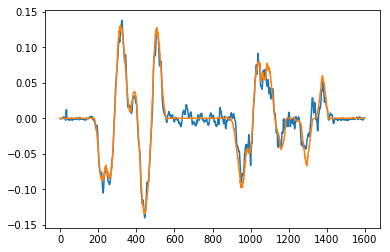

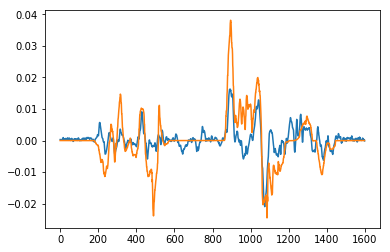

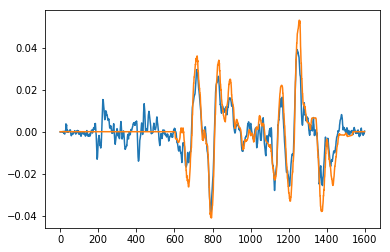

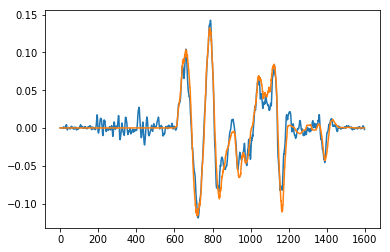

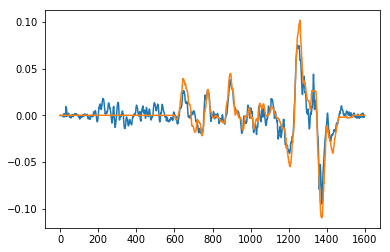

In [2]:
import os, cv2
import matplotlib.pyplot as plt
import numpy as np

def same_size(X,y):
    minlength = min(y.shape[0],X.shape[0])
    print minlength
    y = y[:minlength]
    X = X[:minlength]
    return X,y

data = np.load('cloth/data2_grid.npz')
vel = data['vel']
pos = data['pos']
feat = data['feat']

y = vel[:]
y = np.vstack((np.zeros((15,pos.shape[1])), pos[30:] - pos[:-30]))


# smooth the input data by 5
from scipy.ndimage.filters import uniform_filter1d
X = uniform_filter1d(feat,5,axis=0)
#compute the gradient of the feature vector
X = np.vstack((np.zeros((15,X.shape[1])), X[30:] - X[:-30]))
print X.shape, y.shape
X,y = same_size(X,y)

print X.shape, y.shape

# begin training
from sklearn.linear_model import LinearRegression
#model = LinearRegression()

from sklearn import linear_model
model = linear_model.Lasso(alpha = 0.1)


inds = sorted(np.random.choice(1500, 500, replace=False))
X_train = X[inds]
y_train = y[inds]
model.fit(X_train, y_train)
y_pred = model.predict(X)

#y_pred = uniform_filter1d(y_pred,30)
for i in range(y_pred.shape[1]):
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(y.shape[0]),y[:,i])
    plt.show()

(1584, 384) (1586, 6)
1584
(1584, 384) (1584, 6)


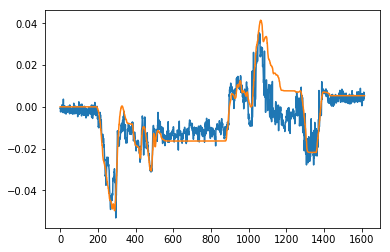

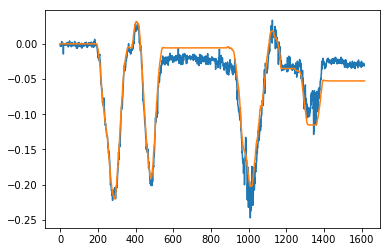

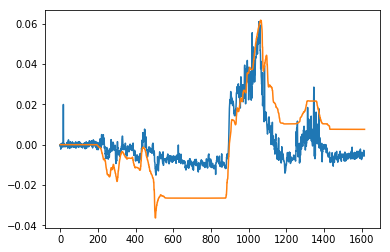

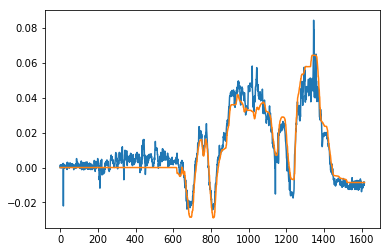

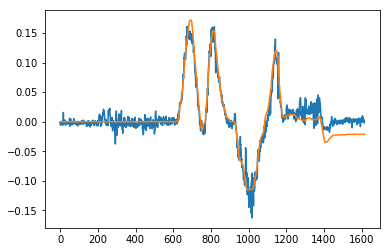

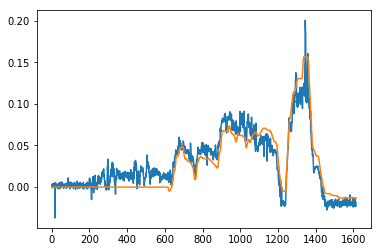

In [3]:
import os, cv2
import matplotlib.pyplot as plt
import numpy as np

def same_size(X,y):
    minlength = min(y.shape[0],X.shape[0])
    print minlength
    y = y[:minlength]
    X = X[:minlength]
    return X,y


#data = np.load('cloth2/controller/data.npz')
data = np.load('cloth/data2_grid.npz')
vel = data['vel']
pos = data['pos']
feat = data['feat']
y = pos[30:]-pos[:-30]

from scipy.ndimage.filters import uniform_filter1d
#compute the gradient of the feature vector
X = feat[30:]-feat[:-30]
X = uniform_filter1d(X,5,axis=0) # smooth the input data by 5

print X.shape, y.shape
X,y = same_size(X,y)

print X.shape, y.shape

# begin training
from sklearn import linear_model
model = linear_model.Lasso(alpha =.01)

inds = sorted(np.random.choice(1500, 200, replace=False))
X_train = X[inds]
y_train = y[inds]
model.fit(X_train, y_train)

# Use the model to predict the velocity/direction of end effector
target = 0  # target index  
X = feat - feat[target]
y = pos - pos[target]

y_pred = model.predict(X)
for i in range(y_pred.shape[1]):
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(y.shape[0]),y[:,i])
    plt.show()

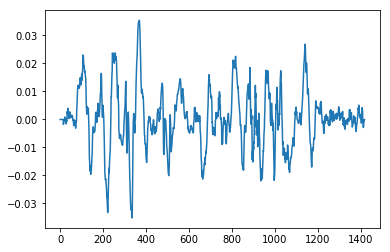

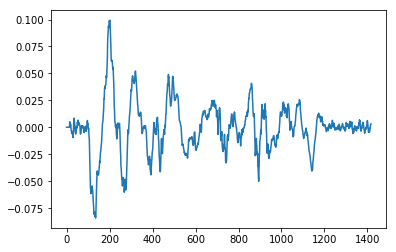

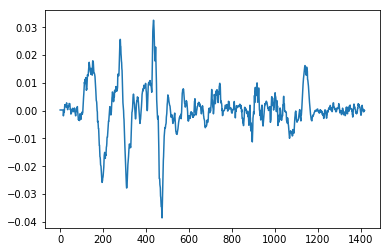

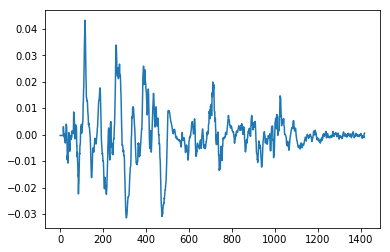

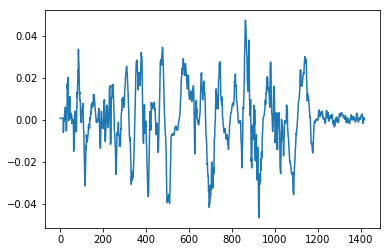

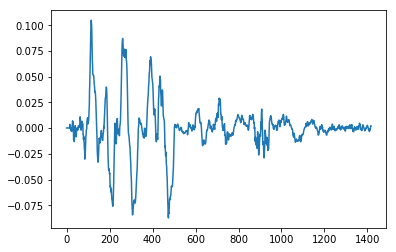

In [34]:
data = np.load('cloth2/right/data3_fg_grid.npz')
feat = data['feat']
X = uniform_filter1d(feat,5,axis=0)
#compute the gradient of the feature vector
X = np.vstack((np.zeros((15,X.shape[1])), X[30:] - X[:-30]))
y_pred = model.predict(X)

#y_pred = uniform_filter1d(y_pred,30)
for i in range(y_pred.shape[1]):
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.show()